In [24]:
import argparse

import torch
import uuid

import numpy as np

from torch_geometric.nn import Node2Vec
from torch_geometric.utils import erdos_renyi_graph

import os
import csv

import gph
import gtda
from gtda import diagrams
from gtda import homology

import matplotlib.pyplot as plt

In [25]:
## import files
d = 5
n = 10
l = 10 
c = 5

filename = 'er'
filename += '-c'+str(c)
filename += '-d'+ str(d)
filename += '-l'+str(l)
filename += '-n'+ str(n)

## get filenames according to filter
path = '../rawos'
files = []
for i in os.listdir(path):
    if os.path.isfile(os.path.join(path,i)) and filename in i:
        files.append(i)
        
print(files)

['er-c5-d5-l10-n10-3ab3b40f452544febe3662e98bc3cdfe.tsv', 'er-c5-d5-l10-n10-3eb59b182eb3460081807487e0a76f35.tsv']


In [26]:
## load embeddings
Emb_list= []
dim = 0
for i,file in zip(range(len(files)),files): 
    emb = np.loadtxt(path+'/'+file, delimiter="\t")
    Emb_list.append(emb)
    if emb.shape[0] > dim:
        dim = emb.shape[0]

Embs = np.zeros((len(Emb_list),dim,5)) 
for i in range(len(Emb_list)):
    Embs[i,:,:] = Emb_list[i] 
##compute PH
max_dim = 2
ph = gtda.homology.VietorisRipsPersistence(metric='euclidean', max_edge_length=np.inf, homology_dimensions=tuple(range(max_dim+1)), coeff=2, infinity_values=None, n_jobs=None).fit_transform(Embs)
print(ph.shape)

## compute pairwise distances
Dist  =gtda.diagrams.PairwiseDistance(metric='wasserstein', metric_params=None, order=None, n_jobs=None).fit_transform(ph, None)
print(Dist)
print(Dist.shape)

(2, 333, 3)
[[[0.         0.         0.        ]
  [1.24888606 0.45884894 0.10447889]]

 [[1.24911826 0.45884894 0.10447889]
  [0.         0.         0.        ]]]
(2, 2, 3)


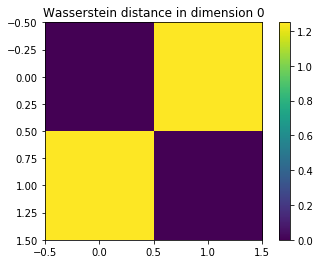

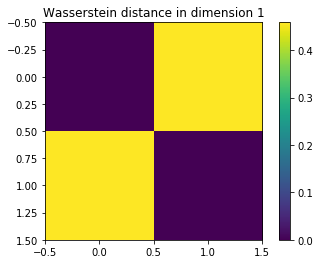

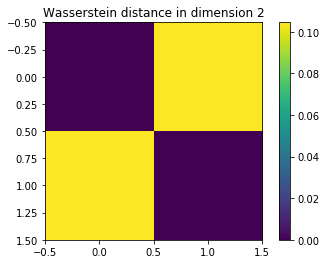

In [27]:
for i in range(Dist.shape[2]):
    plt.imshow(Dist[:,:,i])
    plt.colorbar()
    plt.title('Wasserstein distance in dimension {}'.format(i))
    plt.savefig('blabla{}'.format(i))
    plt.show()
    

In [28]:
##Save distance matrices

for i in range(max_dim+1):
    dist_filenment = filename + '_Wasserstein_dim' + str(i) +'.tsv'

    np.savetxt(
            filename,
            Dist[:,:,0],
            delimiter='\t',
            fmt='%.4f'
        )